

# Data Dictionary
We assume that the data shows the matured travel insurance plans issued by Singapore agencies. We also set the definition of each of the columns as below. 

|Columns|Description|
|-|-|
|Agency| Name of agency |
|Agency Type|Type of travel insurance agencies|
|Distribution Channel|Distribution channel of travel insurance agencies|
|Product Name|Name of the travel insurance products|
|Claim|Claim Status|
|Duration|Duration of travel|
|Destination|Destination of travel|
|Net Sales|Amount of sales of travel insurance policies (in SGD)|
|Commision (in value)|Commission received for travel insurance agency (in SGD)|
|Gender|Gender of insured|
|Age|Age of insured|

# Exploratory Data Analysis
We will use 10 charts to demonstrate the underlying patterns of the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("[MASA Hackathon 2022] Travel Insurance Data Set .xlsx")

In [3]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [6]:
df.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Claim                      2
Duration                 455
Destination              149
Net Sales               1139
Commision (in value)    1035
Gender                     2
Age                       89
dtype: int64

In [7]:
df2 = df.rename({'Agency Type': 'Agency_Type', 'Distribution Channel': 'Distribution_Channel',
                 'Product Name': 'Product', 'Net Sales': 'Net_Sales', 'Commision (in value)': 'Commission'}, axis=1)

Text(0.5, 1, 'Chart 1: Pairwise Scatterplots of Numeric Variables')

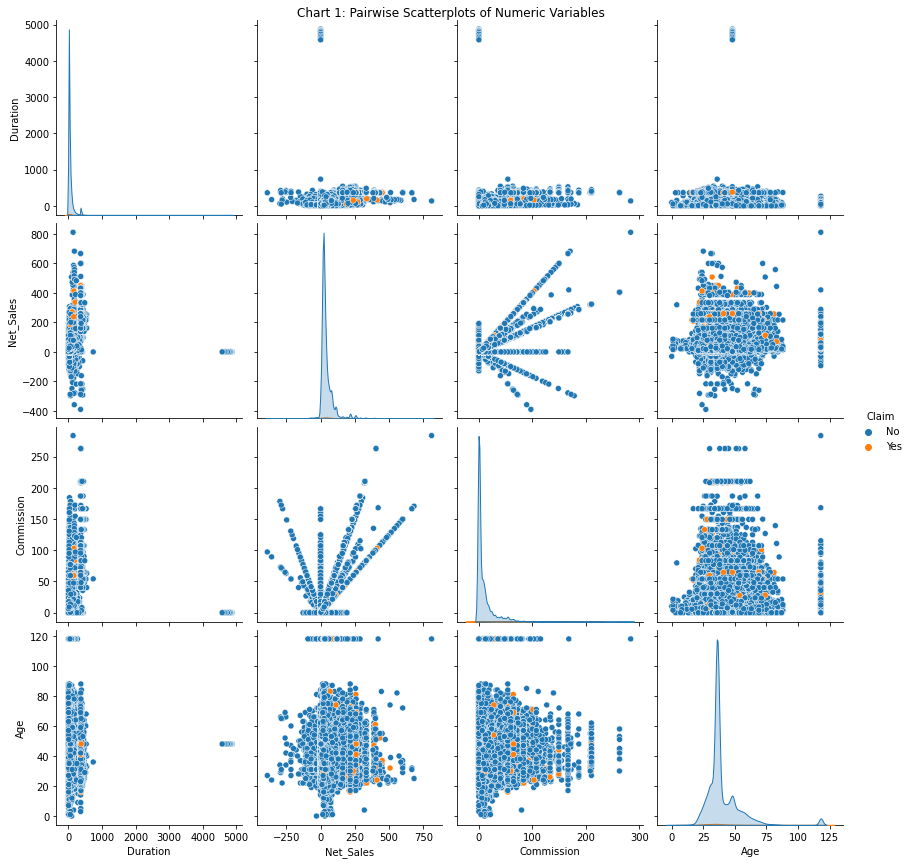

In [8]:
sns.pairplot(df2, height=3, hue="Claim").fig.suptitle(
    "Chart 1: Pairwise Scatterplots of Numeric Variables", y=1)

Text(0.5, 1.0, 'Chart 2: Correlation Heatmap of Numeric Variables')

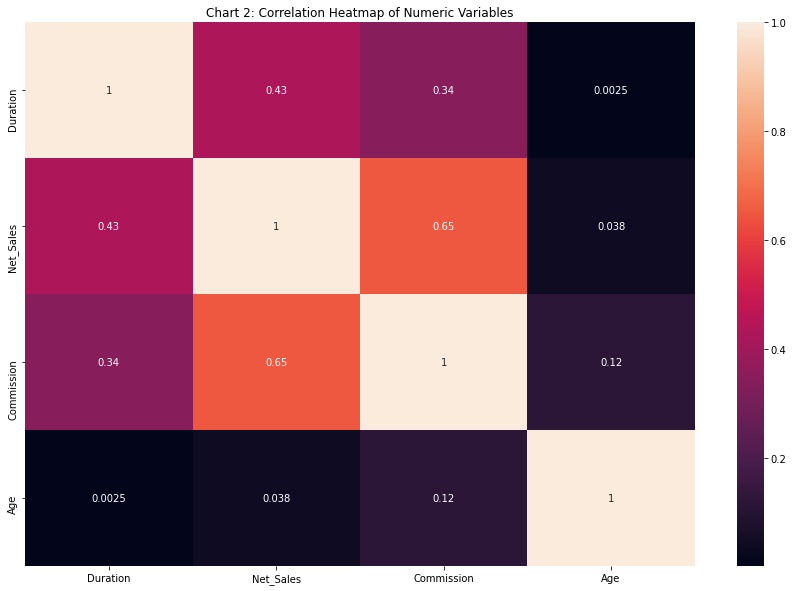

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True).set_title(
    "Chart 2: Correlation Heatmap of Numeric Variables")

## Claim Rate
- We want to see how claim rate is related to some variables 

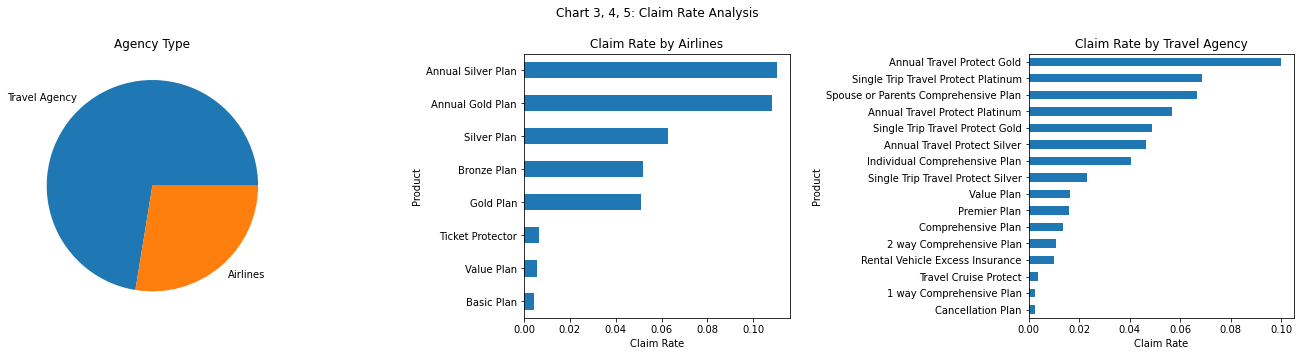

In [10]:
df3 = df2.groupby(['Agency_Type', 'Product'])['Claim'].value_counts(
    normalize=True).to_frame(name='Claim_Rate').reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3)
plt.suptitle('Chart 3, 4, 5: Claim Rate Analysis')
df2.Agency_Type.value_counts(normalize=True).plot(
    kind="pie", title="Agency Type", ylabel="", ax=axes[0], figsize=(18, 5))
df3[(df3["Claim"] == "Yes") & (df3["Agency_Type"] == "Airlines")].sort_values(by=['Claim_Rate']).plot(
    kind="barh", x="Product", y="Claim_Rate", legend=False, title="Claim Rate by Airlines", ax=axes[1])
axes[1].set_xlabel("Claim Rate")
df3[(df3["Claim"] == "Yes") & (df3["Agency_Type"] == "Travel Agency")].sort_values(by=['Claim_Rate']).plot(
    kind="barh", x="Product", y="Claim_Rate", legend=False, title="Claim Rate by Travel Agency", ax=axes[2])
axes[2].set_xlabel("Claim Rate")
fig.tight_layout()
plt.subplots_adjust(wspace=0.9, top=0.85)

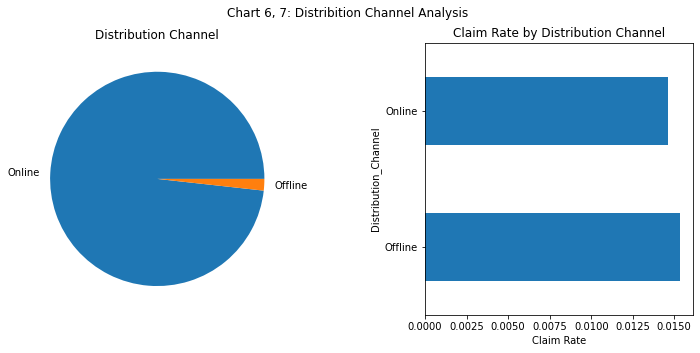

In [11]:
df4 = df2.groupby(['Distribution_Channel'])['Claim'].value_counts(
    normalize=True).to_frame(name='Claim_Rate').reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Chart 6, 7: Distribition Channel Analysis')
df2.Distribution_Channel.value_counts(normalize=True).plot(
    kind="pie", title="Distribution Channel", ylabel="", ax=axes[0], figsize=(12, 5))
df4[(df4["Claim"] == "Yes")].sort_values(by=['Claim_Rate'], ascending=False).plot(kind="barh", x="Distribution_Channel",
                                                                                  y="Claim_Rate", ylabel="Claim_Rate", legend=False, title="Claim Rate by Distribution Channel", ax=axes[1])
axes[1].set_xlabel("Claim Rate")
plt.subplots_adjust(wspace=0.5)

## Net Sales and Commission
- We observed that there is a linear dependency between net sales and commission
- We wanted to find out what causes them to have different slopes


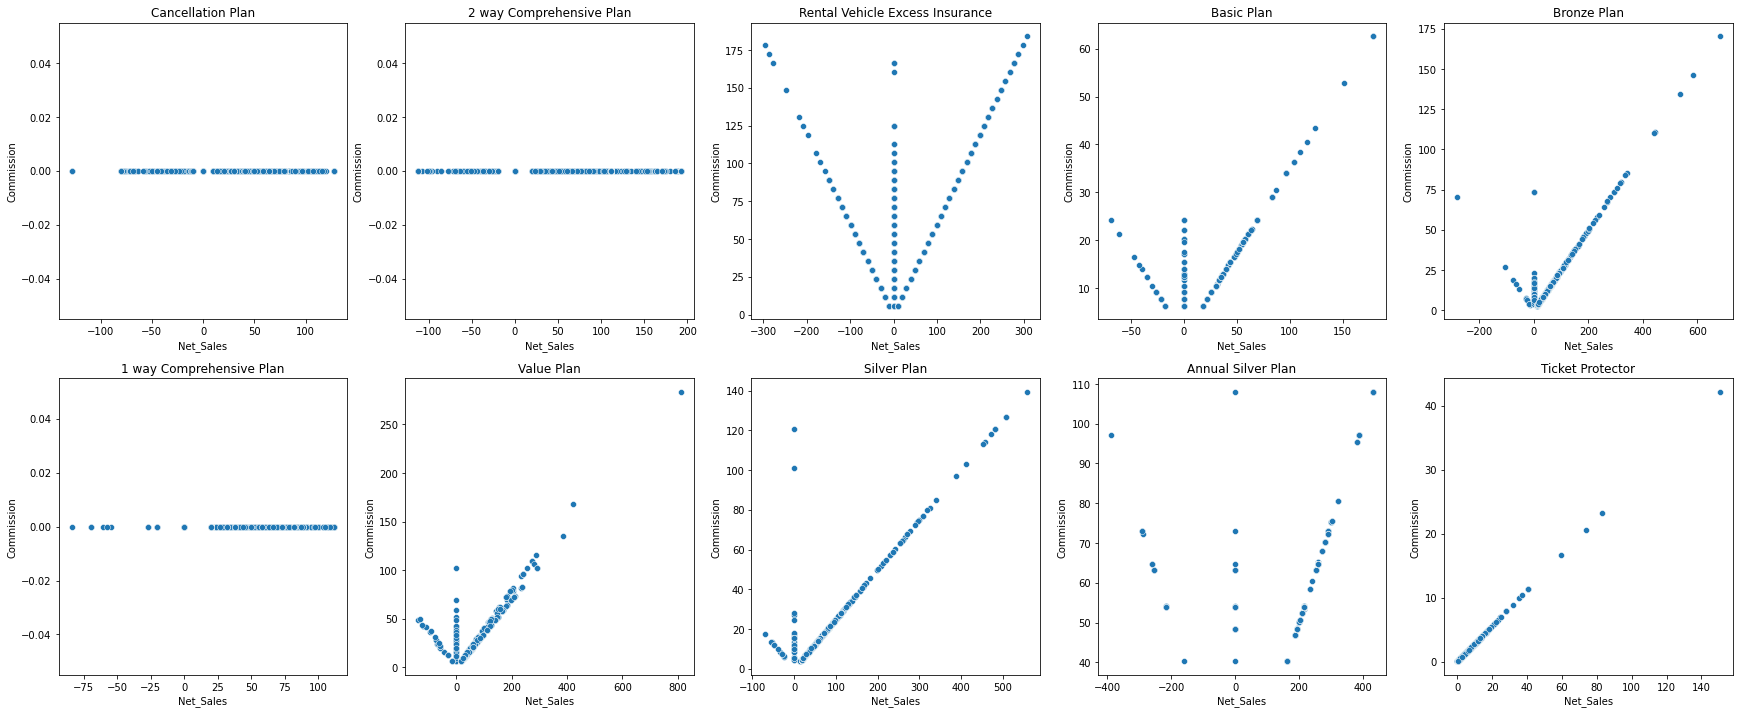

In [12]:
topProduct_COUNT = df2.groupby(["Product"])["Net_Sales"].agg(
    "count").sort_values(ascending=False).reset_index()

plt.figure(figsize=(30, 12))

a = 1
for i in topProduct_COUNT["Product"]:
    if a <= 10:
        plt.subplot(2, 5, a)
        plt.title(i)
        sns.scatterplot(data=df2[(df2['Product'] == i)],
                        x="Net_Sales", y="Commission")
        a = a + 1
    else:
        break

plt.show()

We can easily observe the general pattern of Net Sales vs Commission as shown below.

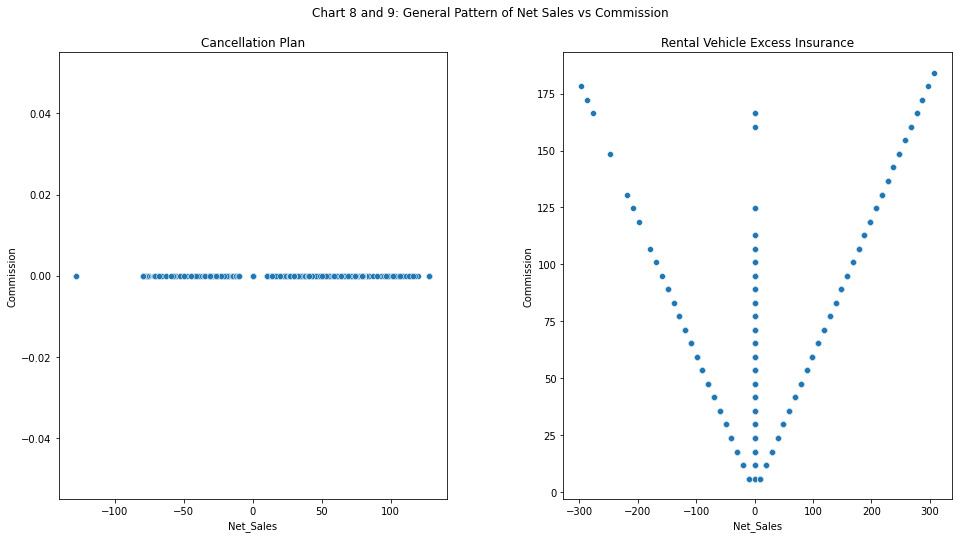

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.gcf().set_size_inches(16, 8)
plt.suptitle('Chart 8 and 9: General Pattern of Net Sales vs Commission')
sns.scatterplot(data=df2[(df2['Product'] == topProduct_COUNT["Product"][0])],
                x="Net_Sales", y="Commission", ax=ax[0])
ax[0].set_title(topProduct_COUNT["Product"][0])
sns.scatterplot(data=df2[(df2['Product'] == topProduct_COUNT["Product"][2])],
                x="Net_Sales", y="Commission", ax=ax[1])
ax[1].set_title(topProduct_COUNT["Product"][2])
# fig.tight_layout()
plt.subplots_adjust(wspace=0.3, top=0.9)

## Duration

Text(0.5, 0, 'Duration (Mean)')

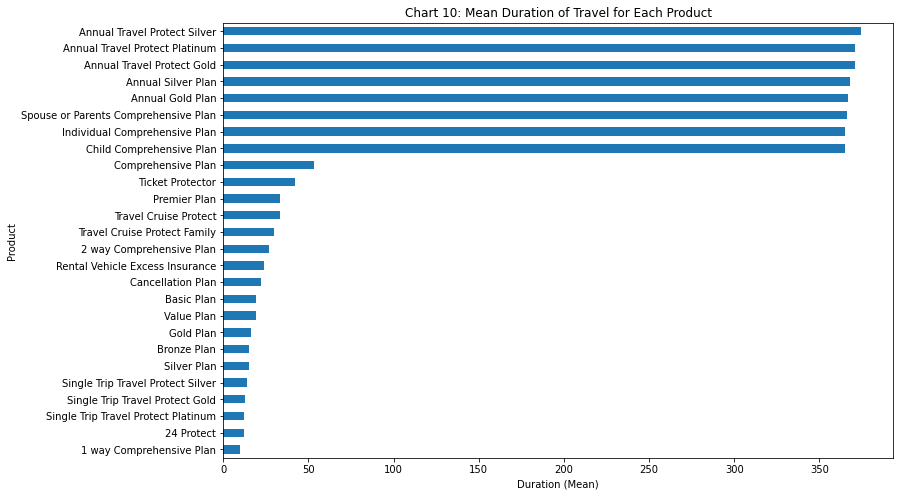

In [14]:
df2.groupby(["Product"])["Duration"].agg("median").sort_values().plot(
    kind="barh", figsize=(12, 8), title="Chart 10: Mean Duration of Travel for Each Product")
plt.xlabel("Duration (Mean)")

# Feature Selection and Engineering

## Data Cleaning

### Incorrect Data

Looking back at Net Sales and Commission, we see 2 general patterns (see Chart 8 and 9):
1. Commission is constant (e.g., Cancellation Plan)
2. Net Sales and Commission are linearly dependent when Net Sales is not equal to 0, and behave as a almost perfect even function. At the same time, Commission varies when net sales equals to 0 (e.g., Rental Vehicle Excess Insurance)

If you think very carefully, pattern 2 is so odd in some ways:
1. For Net Sales = $-S$ and Commission = $C$, in most cases, there exists another entry of Net Sales = $S$ and Commission = $C$
2. For Net Sales = 0 and Commission = $C$, in most cases, there exists another entry of Net Sales = $-S$ or $S$ and Commission = $C$
3. When Net Sales = 0, the Commission varies. However, when Net Sales is non-zero but is very close to zero, the Commission becomes very close to zero too

Pattern 2 suggested that the data is incorrect in some ways:
1. The value of Net Sales have to be non-negative, so we will take absolute value of all Net Sales (see point 1 above)
2. To ensure that Net Sales $\ge$ Commission, we will use available entries for reference to correct the Net Sales. Otherwise, we will build linear regression models for each pair of Product and Agency to interpolate the missing values (see point 2 and 3 above) 




In [15]:
from sklearn.linear_model import LinearRegression

df5 = df2[df2["Net_Sales"] != 0]
df5["Net_Sales"] = abs(df5["Net_Sales"])


totalDf = df2.groupby(["Agency", "Product"]).first().reset_index()
totalDf = totalDf[["Product", "Agency"]]
totalDf["Model (Slope, Intercept, R2)"] = 0


dic = {i: {} for i in totalDf["Agency"].unique()}

for i, j in zip(totalDf.Product, totalDf.Agency):
    try:
        # extract "Product" and "Agency" combination in df3
        temp = df5[(df5["Product"] == i) & (df5["Agency"] == j)]
        model = LinearRegression().fit(
            np.array(temp["Commission"]).reshape((-1, 1)), temp["Net_Sales"])
        r_sq = model.score(
            np.array(np.array(temp["Commission"]).reshape((-1, 1))), temp["Net_Sales"])
        dic[j][i] = [model.coef_[0], model.intercept_, r_sq]
        totalDf.loc[(totalDf["Product"] == i) & (totalDf["Agency"] == j), "Model (Slope, Intercept, R2)"] = str(
            model.coef_[0])[:5] + ", " + str(model.intercept_)[:5] + ", "+str(r_sq)[:5]
    except:
        pass

# display model: slope, intercept, R2
totalDf

,Product,Agency,"Model (Slope, Intercept, R2)"
0,Premier Plan,ADM,"2.631, 2.842, 1.0"
1,Value Plan,ADM,"2.631, 4.263, 1.0"
2,24 Protect,ART,"2.857, 0.000, 0.999"
3,Value Plan,ART,"2.857, 1.421, 1.0"
4,Annual Gold Plan,C2B,"4.000, -0.01, 0.999"
5,Annual Silver Plan,C2B,"4.000, 0.001, 0.999"
6,Bronze Plan,C2B,"4.000, -0.00, 0.999"
7,Gold Plan,C2B,"4.000, -0.00, 0.999"
8,Silver Plan,C2B,"4.000, -0.01, 0.999"
9,Comprehensive Plan,CBH,"0.0, 29.0, 1.0"


From the dataframe above, most of the models have a high R-squared coefficient. There are 8 models require further investigation as they have slope = 0 or R-squared = 0.

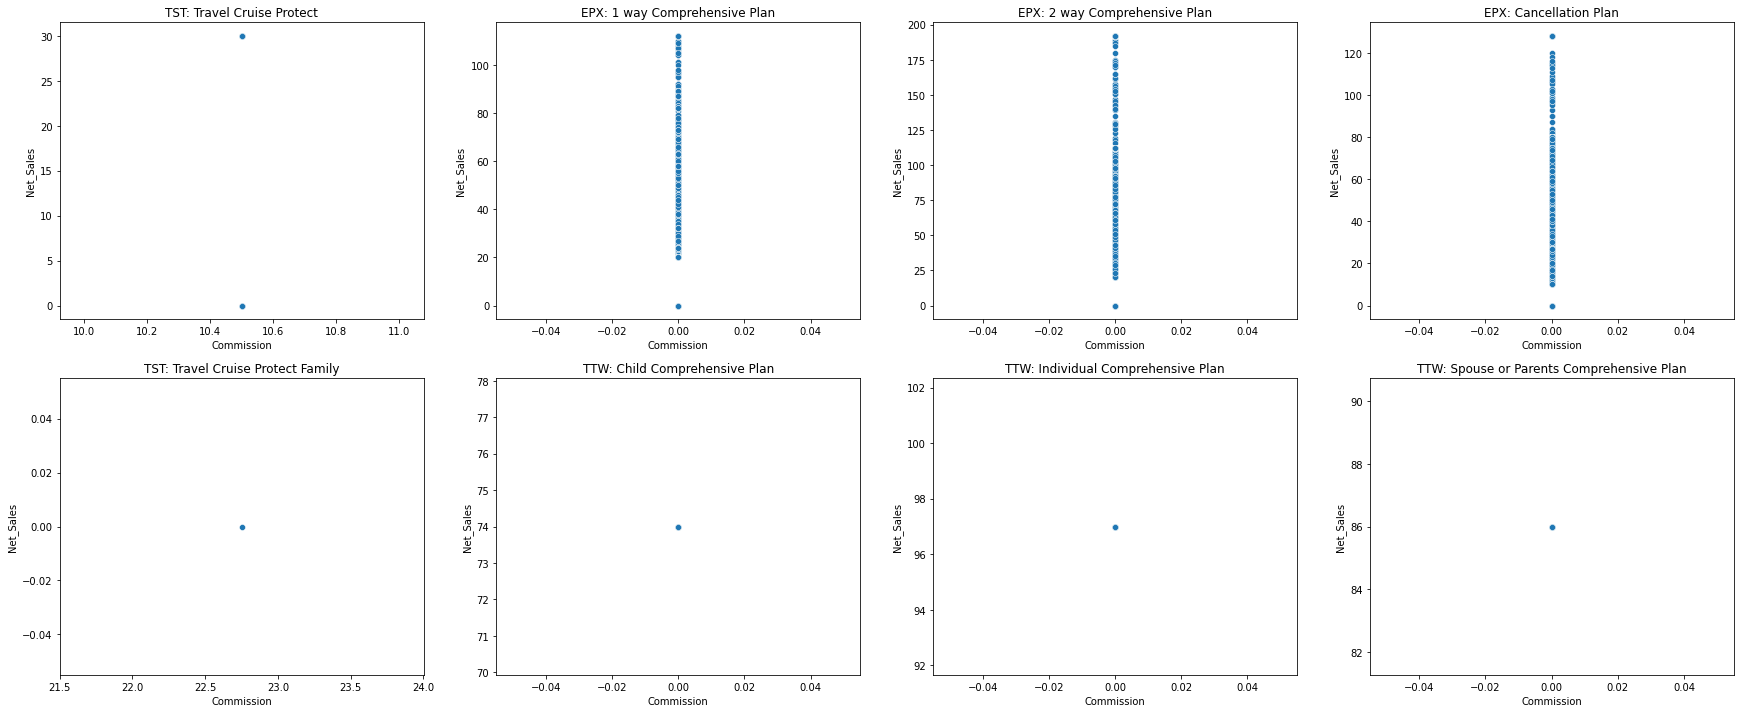

In [16]:
df6 = df2.copy()
df6["Net_Sales"] = abs(df6["Net_Sales"])
plt.figure(figsize=(30, 12))

a = [
    ["TST", "Travel Cruise Protect"],
    ["EPX", "1 way Comprehensive Plan"],
    ["EPX", "2 way Comprehensive Plan"],
    ["EPX", "Cancellation Plan"],
    ["TST", "Travel Cruise Protect Family"],
    ["TTW", "Child Comprehensive Plan"],
    ["TTW", "Individual Comprehensive Plan"],
    ["TTW", "Spouse or Parents Comprehensive Plan"]
]

i = 1
for agency, product in a:
    # Get scatterplot for slope = 0 model
    plt.subplot(2, 4, i)
    plt.title(agency+": "+product)
    sns.scatterplot(data=(df6[(df6['Product'] == product) & (
        df6["Agency"] == agency)]), y="Net_Sales", x="Commission")
    i += 1


plt.show()

Our next step is to modify Net Sales with trivial values to another value interpolated by the linear regression models. Note that the model will only apply when R-squared $\ge$ 0.99, and the values of Net Sales will remain otherwise.

In [17]:
def change_net_sales(x):
    try:
        # y = mX + C if r2 >= 0.99 else use remain
        return (dic[x.Agency][x.Product][0] * x.Commission) + dic[x.Agency][x.Product][1] if dic[x.Agency][x.Product][2] >= 0.99 else x.Net_Sales
    except:
        print(x)  # data that cannot find linear regression model
        return 0


df6["Net_Sales"] = df6.apply(
    lambda x: x.Net_Sales if x.Net_Sales != 0 else change_net_sales(x), axis=1)

Agency                                           TST
Agency_Type                            Travel Agency
Distribution_Channel                         Offline
Product                 Travel Cruise Protect Family
Claim                                             No
Duration                                          30
Destination                                 MALAYSIA
Net_Sales                                        0.0
Commission                                     22.75
Gender                                             M
Age                                               32
Name: 47122, dtype: object


Based on the ouput, there is only one entry that does not have a valid linear regression model to adjust its Net Sales.

In [18]:
df6[df6["Product"] == "Travel Cruise Protect Family"]

,Agency,Agency_Type,Distribution_Channel,Product,Claim,Duration,Destination,Net_Sales,Commission,Gender,Age
47122,TST,Travel Agency,Offline,Travel Cruise Protect Family,No,30,MALAYSIA,0.0,22.75,M,32


We decided to remove this row as there is no way to know its reasonable Net Sales.

In [19]:
df6.drop(df6[df6["Product"] == "Travel Cruise Protect Family"].index, inplace=True)

In [20]:
sum(df6["Commission"] > df6["Net_Sales"])

0

In [21]:
sum(df6["Net_Sales"] < 0)

0

After data cleaning, all entries satisfy Net Sales $\ge$ Commission. 

### Missing Data/Values

In [22]:
df6.isnull().sum()

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product                     0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commission                  0
Gender                  45107
Age                         0
dtype: int64

In [23]:
print('{0:.2f}'.format(df6.Gender.isnull().sum() / (df6.Gender.isnull().sum() +
      df6.Gender.count()) * 100), "% of Gender data is null.")

71.23 % of Gender data is null.


In [24]:
# Since Gender has too many null values, we decided to drop it.
df7 = df6.drop('Gender', axis=1)

### Duplicated Data

In [25]:
# We believe that it is almost impossible to have duplicated entries
df8 = df7.drop_duplicates()

print("Length of an original data frame :", len(df7))
print("Amount of Duplicated data removed:", len(df7) - len(df8))
print("Number of rows after deduping    :", len(df8))

Length of an original data frame : 63325
Amount of Duplicated data removed: 9248
Number of rows after deduping    : 54077


### Outlier

1. Age

<AxesSubplot:ylabel='Age'>

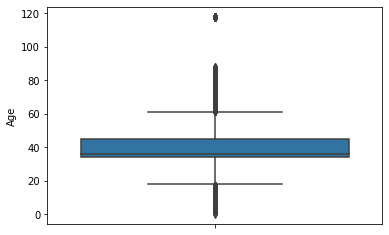

In [26]:
sns.boxplot(y=df8['Age'])

<AxesSubplot:ylabel='Age'>

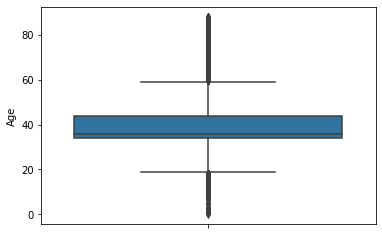

In [27]:
# We decided to remove the outlier and focus on 0-100 years old
df9 = df8[(df8['Age'] >= 0) & (df8['Age'] <= 100)]
sns.boxplot(y=df9['Age'])

2. Duration

<AxesSubplot:ylabel='Duration'>

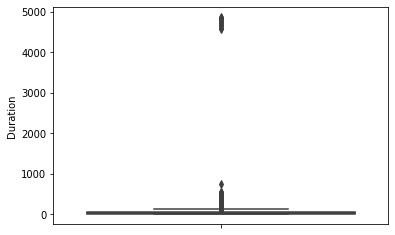

In [28]:
sns.boxplot(y=df9['Duration'])

<AxesSubplot:ylabel='Duration'>

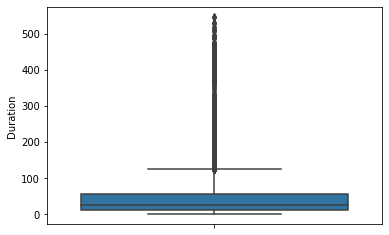

In [29]:
# We decided to remove the outlier and focus on duration that are within 2 years (730 days)
df10 = df9[(df9['Duration'] >= 0) & (df9['Duration'] <= 730)]
sns.boxplot(y=df10['Duration'])

3. Net Sales

<AxesSubplot:ylabel='Net_Sales'>

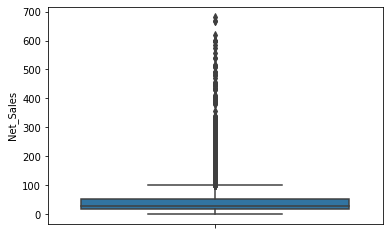

In [30]:
sns.boxplot(y=df10['Net_Sales'])

4. Commission

<AxesSubplot:ylabel='Commission'>

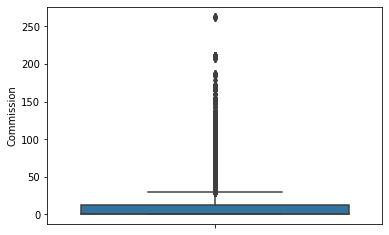

In [31]:
sns.boxplot(y=df10['Commission'])

## Visualisation after Data Cleaning

After data cleaning, we are interested in some visualisation.

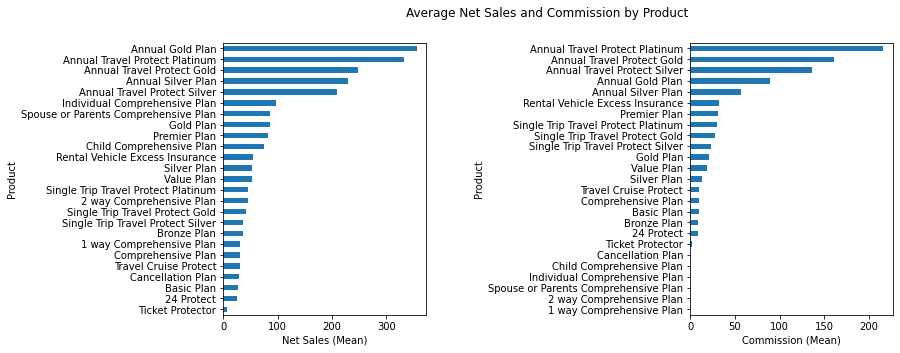

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Average Net Sales and Commission by Product')
df10.groupby(["Product"])["Net_Sales"].agg("mean").sort_values().plot(
    kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Net Sales (Mean)")

df10.groupby(["Product"])["Commission"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Commission (Mean)")
plt.subplots_adjust(wspace=1.3)

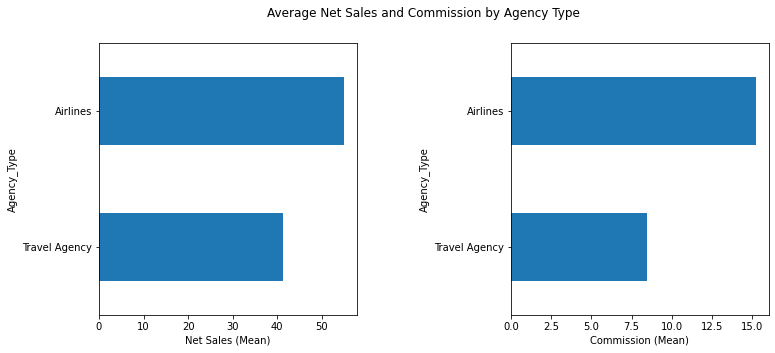

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Average Net Sales and Commission by Agency Type')
df10.groupby(["Agency_Type"])["Net_Sales"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Net Sales (Mean)")

df10.groupby(["Agency_Type"])["Commission"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Commission (Mean)")
plt.subplots_adjust(wspace=0.6)

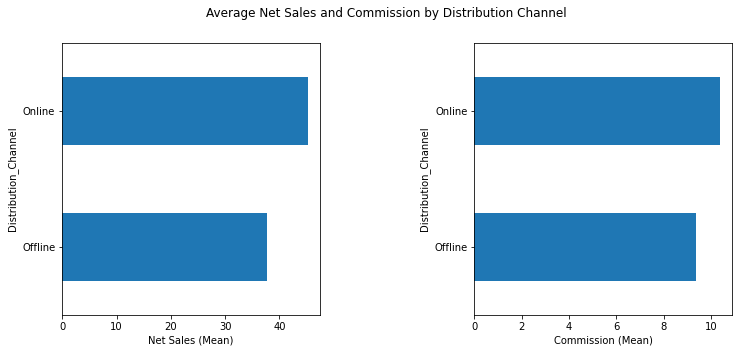

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Average Net Sales and Commission by Distribution Channel')
df10.groupby(["Distribution_Channel"])["Net_Sales"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Net Sales (Mean)")

df10.groupby(["Distribution_Channel"])["Commission"].agg(
    "mean").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Commission (Mean)")
plt.subplots_adjust(wspace=0.6)

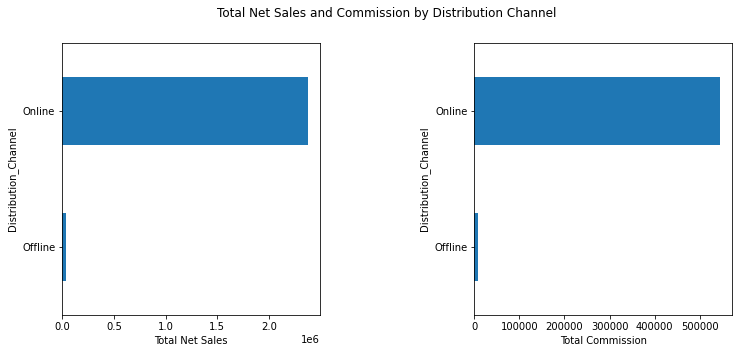

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Total Net Sales and Commission by Distribution Channel')
df10.groupby(["Distribution_Channel"])["Net_Sales"].agg(
    "sum").sort_values().plot(kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Total Net Sales")

df10.groupby(["Distribution_Channel"])["Commission"].agg(
    "sum").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Total Commission")
plt.subplots_adjust(wspace=0.6)

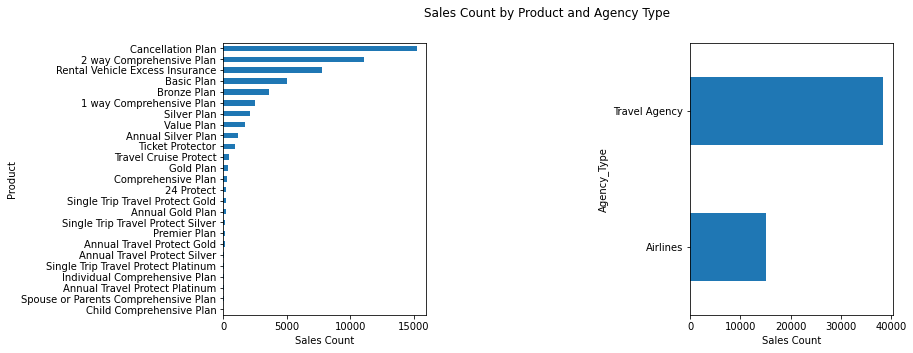

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Sales Count by Product and Agency Type')
df10.groupby(["Product"])["Net_Sales"].agg("count").sort_values().plot(
    kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Sales Count")

df10.groupby(["Agency_Type"])["Net_Sales"].agg(
    "count").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Sales Count")
plt.subplots_adjust(wspace=1.3)

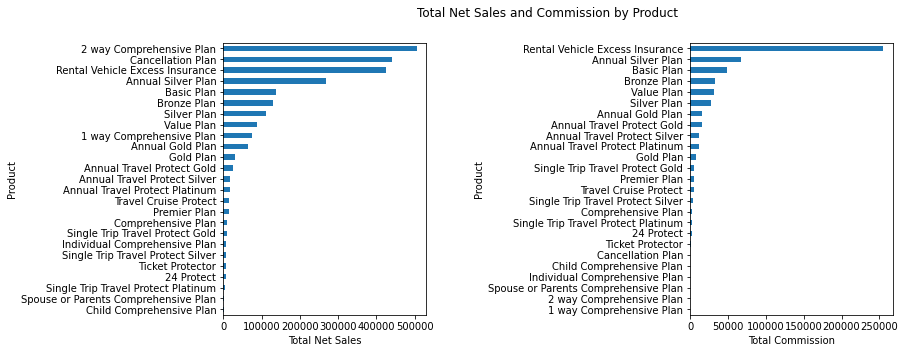

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle('Total Net Sales and Commission by Product')
df10.groupby(["Product"])["Net_Sales"].agg("sum").sort_values().plot(
    kind="barh", ax=axes[0], figsize=(12, 5))
axes[0].set_xlabel("Total Net Sales")

df10.groupby(["Product"])["Commission"].agg(
    "sum").sort_values().plot(kind="barh", ax=axes[1])
axes[1].set_xlabel("Total Commission")
plt.subplots_adjust(wspace=1.3)

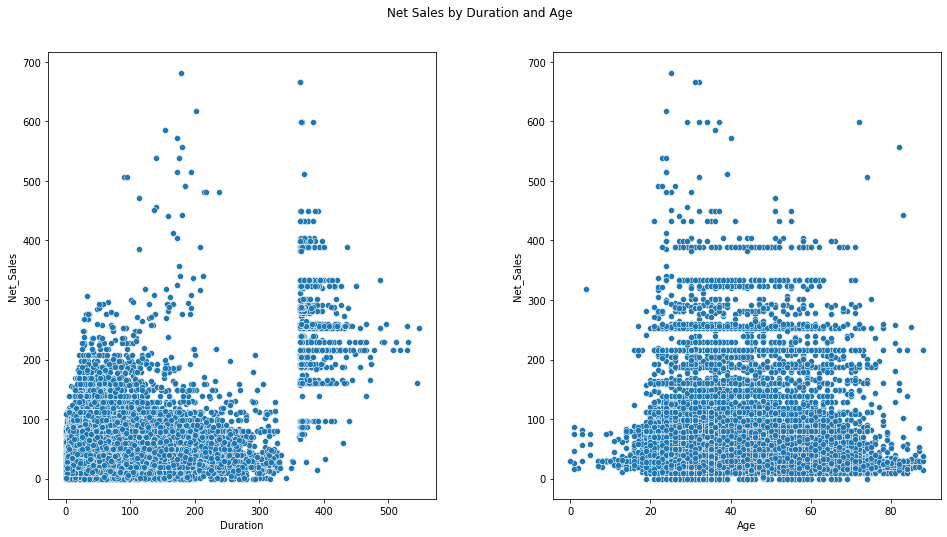

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.gcf().set_size_inches(16, 8)
plt.suptitle('Net Sales by Duration and Age')
sns.scatterplot(data=df10,
                x="Duration", y="Net_Sales", ax=ax[0])
sns.scatterplot(data=df10,
                x="Age", y="Net_Sales", ax=ax[1])
# fig.tight_layout()
plt.subplots_adjust(wspace=0.3, top=0.9)

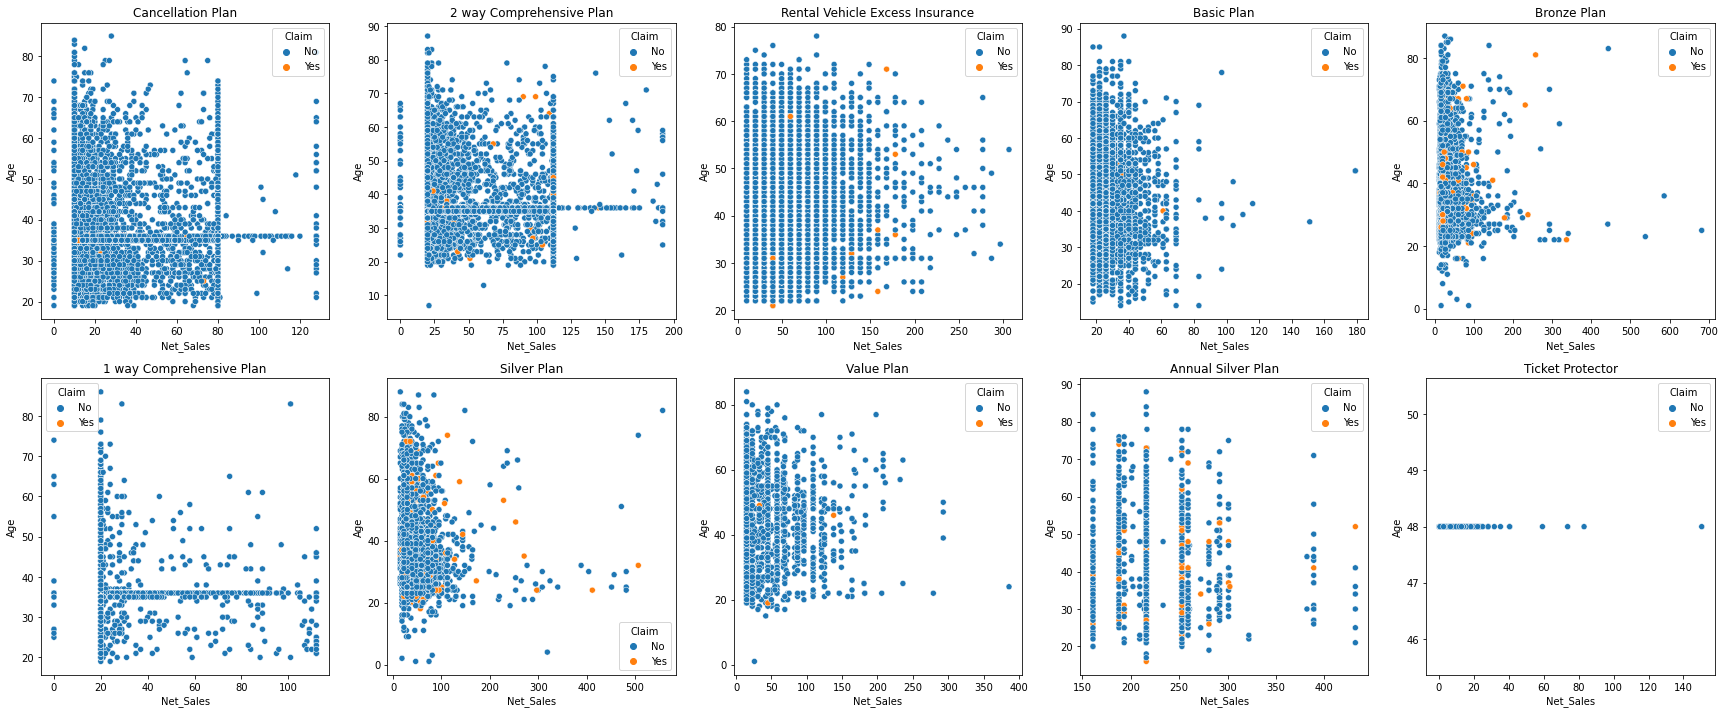

In [36]:
topProduct_Com_COUNT = df10.groupby(["Product"])["Commission"].agg(
    "count").sort_values(ascending=False).reset_index()

plt.figure(figsize=(30, 12))

a = 1
for i in topProduct_Com_COUNT["Product"]:
    if a <= 10:
        plt.subplot(2, 5, a)
        plt.title(i)
        sns.scatterplot(data=df10[(df10['Product'] == i)],
                        x="Net_Sales", y="Age", hue="Claim")
        a = a + 1
    else:
        break

plt.show()

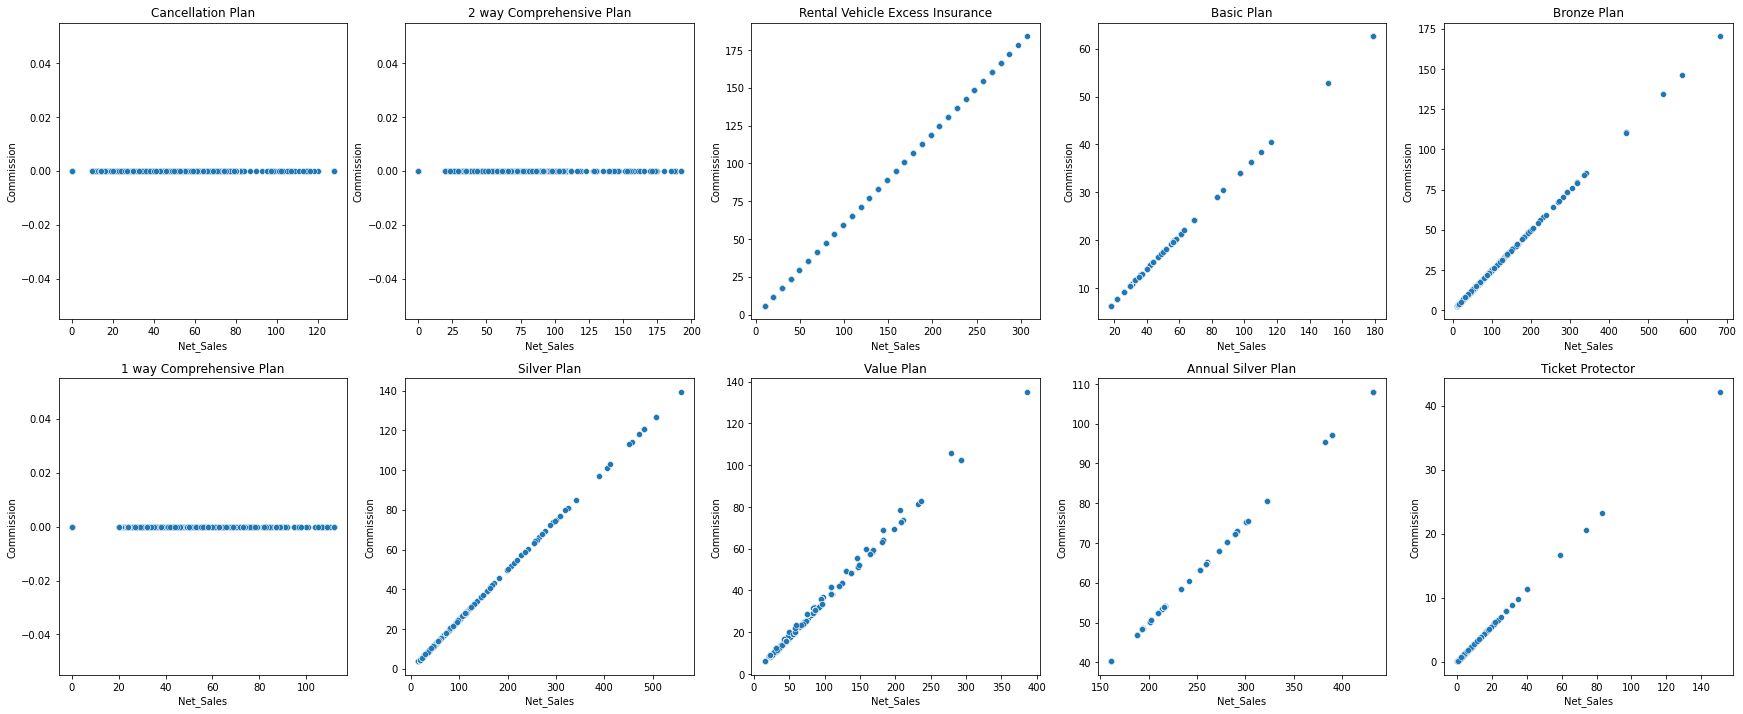

In [37]:
topProduct_COUNT = df10.groupby(["Product"])["Net_Sales"].agg(
    "count").sort_values(ascending=False).reset_index()

plt.figure(figsize=(30, 12))

a = 1
for i in topProduct_COUNT["Product"]:
    if a <= 10:
        plt.subplot(2, 5, a)
        plt.title(i)
        sns.scatterplot(data=df10[(df10['Product'] == i)],
                        x="Net_Sales", y="Commission")
        a = a + 1
    else:
        break

plt.show()

## Data Transformation

In [38]:
# Split Age into Age_Group
df10["Age_Group"] = pd.cut(x=df10["Age"], bins=list(range(0, 101, 5)), labels=[
                           str(i)+"-"+str(i+4) for i in range(0, 99, 5)])

# Drop Age column
df11 = df10.drop('Age', axis=1)

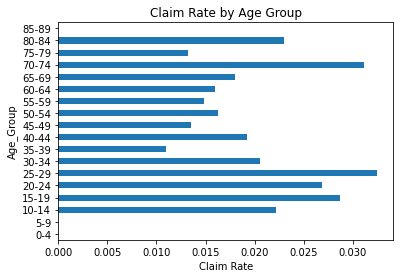

In [41]:
ax = pd.crosstab(index=df11['Age_Group'], columns=df11['Claim'], normalize='index')[
    "Yes"].plot(kind="barh", title="Claim Rate by Age Group")
ax.set_xlabel("Claim Rate")

# Modelling and Evaluation

## Interest variable: Claim

### Data Preprocessing & Data Transforamtion

In [40]:
# Set variables for the targets and features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = df11.drop(columns='Claim', inplace=False)
y = df11['Claim']

# Encoding categorical data

le = LabelEncoder()
X['Agency_Type'] = le.fit_transform(X['Agency_Type'])
X['Distribution_Channel'] = le.fit_transform(X['Distribution_Channel'])
X['Age_Group'] = le.fit_transform(X['Age_Group'])
y = le.fit_transform(y)

ohe = OneHotEncoder(drop=None, sparse=True, handle_unknown='error')
X['Agency'] = ohe.fit_transform(X['Agency'].values.reshape(-1, 1)).toarray()
X['Product'] = ohe.fit_transform(X['Product'].values.reshape(-1, 1)).toarray()
X['Destination'] = ohe.fit_transform(
    X['Destination'].values.reshape(-1, 1)).toarray()

In [41]:
# Feature Selection (VarianceThreshold)
# Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_transform = selector.fit_transform(X, y)

In [42]:
# Load libraries

# Scale the data
from sklearn.preprocessing import StandardScaler
# Pipeline, Gridsearch, Train-test split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
# Plot the confusion matrix at the end of the tutorial
from sklearn.metrics import plot_confusion_matrix
# Regression Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### Split Data

Applying a 70-30 split to form training data and testing data

In [43]:
# Split the data into training test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transform, y, test_size=0.3, random_state=42)

### Pipeline

Oversampling, Normalization, Fitting classifiers to training data

In [44]:
pipe_lr = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', LogisticRegression(random_state=42, verbose=3, n_jobs=12)]])

pipe_dt = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', DecisionTreeClassifier(random_state=42)]])

pipe_rf = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', RandomForestClassifier(random_state=42, verbose=3, n_jobs=12)]])

pipe_knn = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                              ['scl', StandardScaler(with_mean=False)],
                              ['clf', KNeighborsClassifier(n_jobs=12)]])

pipe_xgb = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                              ['scl', StandardScaler(with_mean=False)],
                              ['clf', XGBClassifier(random_state=42, verbosity=3, n_jobs=12)]])

pipe_gb = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                             ['scl', StandardScaler(with_mean=False)],
                             ['clf', GradientBoostingClassifier(random_state=42, verbose=3)]])

### GridSearch

In [45]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [.1, .2, .3]
learning_rates_gb = [0.01, 0.1, 1, 10, 100]

lr_param_grid = [{'clf__penalty': ['l1', 'l2'],
                  'clf__C': param_range_fl,
                  'clf__solver': ['liblinear']}]

dt_param_grid = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

rf_param_grid = [{'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

knn_param_grid = [{'clf__n_neighbors': param_range,
                   'clf__weights': ['uniform', 'distance'],
                   'clf__metric': ['euclidean', 'manhattan']}]

xgb_param_grid = [{'clf__learning_rate': learning_rates,
                   'clf__max_depth': param_range,
                   'clf__min_child_weight': param_range[:2],
                   'clf__subsample': param_range_fl,
                   'clf__n_estimators': n_estimators}]

gb_param_grid = [{'clf__learning_rate': learning_rates_gb,
                  'clf__max_depth': param_range,
                  'clf__n_estimators': n_estimators}]

In [46]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)

lr_grid_search = GridSearchCV(estimator=pipe_lr,
                              param_grid=lr_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
                              param_grid=dt_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
                              param_grid=rf_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
                               param_grid=knn_param_grid,
                               scoring='accuracy',
                               cv=cv,
                               verbose=3, n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
                               param_grid=xgb_param_grid,
                               scoring='accuracy',
                               cv=cv,
                               verbose=3, n_jobs=-1)
gb_grid_search = GridSearchCV(estimator=pipe_gb,
                              param_grid=gb_param_grid,
                              scoring='accuracy',
                              cv=cv,
                              verbose=3, n_jobs=-1)

In [47]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search,
         knn_grid_search, xgb_grid_search, gb_grid_search]
for pipe in grids:
    pipe.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[LibLinear]Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100building tree 5 of 100
building tree 6 of 100

building tree 7 of 100building tree 8 of 100
building tree 9 of 100building tree 10 of 100


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100building tree 21 of 100
building tree 22 of 100

building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100building tree 31 of 100

building tree 32 of 100
building tree 33 of 100
building tree 34 of 100building tree 35 of 100

building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100bu

[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[00:52:10] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 46 

[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 

[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[00:52:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 

        59           1.1400            2.59s
        60           1.1384            2.56s
        61           1.1350            2.53s
        62           1.1328            2.51s
        63           1.1313            2.47s
        64           1.1294            2.44s
        65           1.1281            2.42s
        66           1.1266            2.39s
        67           1.1236            2.36s
        68           1.1199            2.33s
        69           1.1172            2.30s
        70           1.1164            2.27s
        71           1.1143            2.24s
        72           1.1123            2.21s
        73           1.1115            2.18s
        74           1.1097            2.16s
        75           1.1084            2.13s
        76           1.1063            2.10s
        77           1.1043            2.07s
        78           1.1036            2.04s
        79           1.1028            2.01s
        80           1.1022            1.99s
        81

### Model Evaluation

In [48]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'XGBoost', 5: 'Gradient Boost'}

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(
        grid_dict[i], model.score(X_test, y_test)))
    print('{} Best Params: {}\n'.format(grid_dict[i], model.best_params_))

# Results show that K-Nearest Neighbors has the highest accuracy 0.9816, followed by Gradient Boost and XGBoost

Logistic Regression Test Accuracy: 0.7177218344965105
Logistic Regression Best Params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Decision Trees Test Accuracy: 0.8564307078763709
Decision Trees Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}

Random Forest Test Accuracy: 0.7894441674975075
Random Forest Best Params: {'clf__max_depth': 6, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3}



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


K-Nearest Neighbors Test Accuracy: 0.981555333998006
K-Nearest Neighbors Best Params: {'clf__metric': 'manhattan', 'clf__n_neighbors': 2, 'clf__weights': 'uniform'}

XGBoost Test Accuracy: 0.9417996011964108
XGBoost Best Params: {'clf__learning_rate': 0.3, 'clf__max_depth': 5, 'clf__min_child_weight': 2, 'clf__n_estimators': 150, 'clf__subsample': 1.0}

Gradient Boost Test Accuracy: 0.9435443668993021
Gradient Boost Best Params: {'clf__learning_rate': 1, 'clf__max_depth': 3, 'clf__n_estimators': 150}



In [49]:
feature_importance = pd.DataFrame({'feature': list(
    X.columns), 'feature_importance': grids[5].best_estimator_.named_steps['clf'].feature_importances_})
print(feature_importance)

# Results shows that Agency_Type is most significant among other features. Duration and Age_Group are also important in some extent, having feature importances around 0.2

                feature  feature_importance
0                Agency            0.000000
1           Agency_Type            0.523028
2  Distribution_Channel            0.000611
3               Product            0.021999
4              Duration            0.216891
5           Destination            0.000000
6             Net_Sales            0.000000
7            Commission            0.000007
8             Age_Group            0.237463


In [50]:
# K-Nearest Neighbors Classification Report
from sklearn.metrics import classification_report
y_pred_test = grids[3].predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15777
           1       0.07      0.01      0.01       271

    accuracy                           0.98     16048
   macro avg       0.53      0.50      0.50     16048
weighted avg       0.97      0.98      0.97     16048



In [51]:
# Gradient Boost Classification Report
from sklearn.metrics import classification_report
y_pred_test = grids[5].predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     15777
           1       0.06      0.15      0.08       271

    accuracy                           0.94     16048
   macro avg       0.52      0.56      0.53     16048
weighted avg       0.97      0.94      0.96     16048



In [52]:
# XGBoost Classification Report
from sklearn.metrics import classification_report
y_pred_test = grids[4].predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     15777
           1       0.06      0.17      0.09       271

    accuracy                           0.94     16048
   macro avg       0.52      0.56      0.53     16048
weighted avg       0.97      0.94      0.96     16048



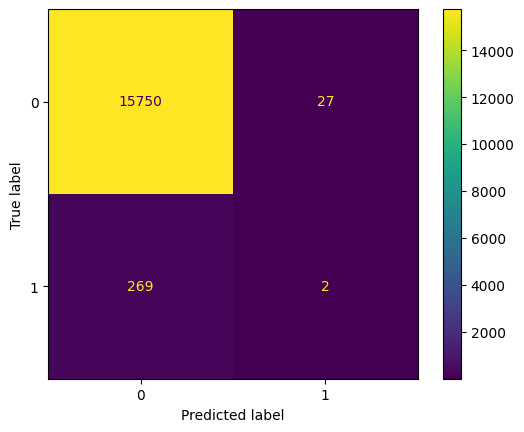

In [53]:
# K-Nearest Neighbors Confusion Matrix
plot_confusion_matrix(grids[3], X_test, y_test)

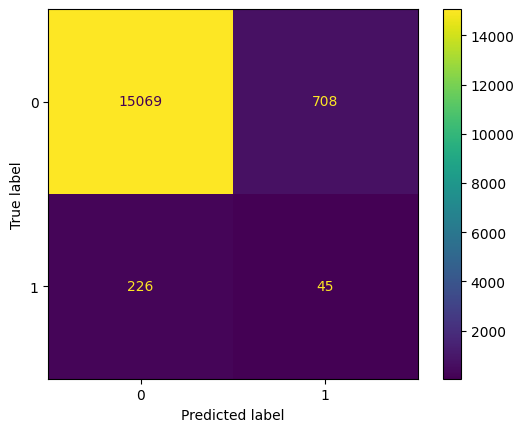

In [54]:
# XGBoost Confusion Matrix
plot_confusion_matrix(grids[4], X_test, y_test)

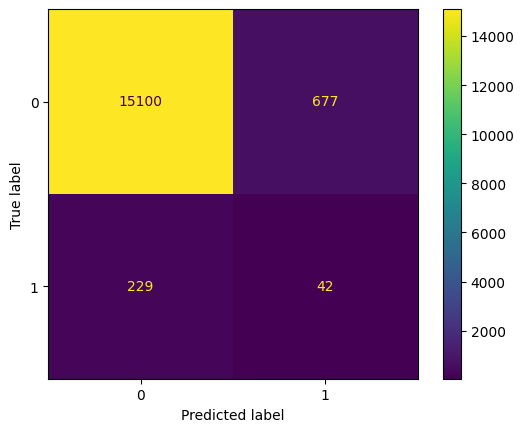

In [55]:
# Gradient Boost Confusion Matrix
plot_confusion_matrix(grids[5], X_test, y_test)

We will likely issue the plan when we predict "no" for claim and we wish to have clients’ claims as least as possible to avoid suffering huge loss. Technically, we require false negative to be small and the recall score to be high. From the classification report above, KNN has the best recall score and its number of false negative is similar to Gradient Boost and XGBoost. Therefore, we would consider KNN model as the best model to predict claims.

*K-NN does not show feature importance so the following code evaluates the feature importance of Gradient Boost instead.

## Interest variable: Net Sales

Data Preprocessing & Data Transformation

In [56]:
# Set variables for the targets and features
X2 = df11.drop(columns=['Net_Sales', 'Commission', 'Claim'], inplace=False)
y2 = df11['Net_Sales']

In [57]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
X2['Agency_Type'] = le.fit_transform(X2['Agency_Type'])
X2['Distribution_Channel'] = le.fit_transform(X2['Distribution_Channel'])
X2['Age_Group'] = le.fit_transform(X2['Age_Group'])

ohe = OneHotEncoder(handle_unknown='error')
X2['Agency'] = ohe.fit_transform(X2['Agency'].values.reshape(-1, 1)).toarray()
X2['Product'] = ohe.fit_transform(
    X2['Product'].values.reshape(-1, 1)).toarray()
X2['Destination'] = ohe.fit_transform(
    X2['Destination'].values.reshape(-1, 1)).toarray()

In [58]:
# Feature Selection (VarianceThreshold)
# Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X2_transform = selector.fit_transform(X2, y2)

In [59]:
# Load libraries

# Pipeline, Gridsearch, Train-test split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

### Split Data

Applying a 70-30 split to form training data and testing data

In [60]:
# Split the data into training test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_transform, y2, test_size=0.3, random_state=42)

### Pipeline

Normalization, Fitting Regressors to training data

In [61]:
pipe_dt = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', DecisionTreeRegressor(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', RandomForestRegressor(random_state=42, verbose=3, n_jobs=-1))])
pipe_knn = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', KNeighborsRegressor(n_jobs=-1))])
pipe_svr = Pipeline([('scl', StandardScaler(with_mean=False)),
                     ('clf', SVR(verbose=3))])
pipe_xgb = Pipeline([('scl', StandardScaler(with_mean=False)),
                     ('clf', XGBRegressor(random_state=42, verbosity=3, n_jobs=-1))])
pipe_gb = Pipeline([('scl', StandardScaler(with_mean=False)),
                    ('clf', GradientBoostingRegressor(random_state=42, verbose=3))])

### GridSearch

In [62]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [.1, .2, .3]
learning_rates_gb = [0.01, 0.1, 1, 10, 100]

dt_param_grid = [{'clf__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
                  'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

rf_param_grid = [{'clf__min_samples_leaf': param_range,
                  'clf__max_depth': param_range,
                  'clf__min_samples_split': param_range[1:]}]

knn_param_grid = [{'clf__n_neighbors': param_range,
                   'clf__weights': ['uniform', 'distance'],
                   'clf__metric': ['euclidean', 'manhattan']}]

svr_param_grid = [{'clf__kernel': ['linear', 'rbf'],
                   'clf__C': param_range}]

xgb_param_grid = [{'clf__learning_rate': learning_rates,
                   'clf__max_depth': param_range,
                   'clf__min_child_weight': param_range[:2],
                   'clf__subsample': param_range_fl,
                   'clf__n_estimators': n_estimators}]

gb_param_grid = [{'clf__learning_rate': learning_rates_gb,
                  'clf__max_depth': param_range,
                  'clf__n_estimators': n_estimators}]

In [63]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
                              param_grid=dt_param_grid,
                              scoring='neg_root_mean_squared_error',
                              cv=cv,
                              verbose=3,
                              n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
                              param_grid=rf_param_grid,
                              scoring='neg_root_mean_squared_error',
                              cv=cv,
                              verbose=3,
                              n_jobs=-1)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
                               param_grid=knn_param_grid,
                               scoring='neg_root_mean_squared_error',
                               cv=cv,
                               verbose=3, n_jobs=-1)
svr_grid_search = GridSearchCV(estimator=pipe_svr,
                               param_grid=svr_param_grid,
                               scoring='neg_root_mean_squared_error',
                               cv=cv,
                               verbose=3, n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
                               param_grid=xgb_param_grid,
                               scoring='neg_root_mean_squared_error',
                               cv=cv,
                               verbose=3, n_jobs=-1)
gb_grid_search = GridSearchCV(estimator=pipe_gb,
                              param_grid=gb_param_grid,
                              scoring='neg_root_mean_squared_error',
                              cv=cv,
                              verbose=3, n_jobs=-1)

In [64]:
grids2 = [dt_grid_search, rf_grid_search, knn_grid_search,
          svr_grid_search, xgb_grid_search, gb_grid_search]
for pipe in grids2:
    pipe.fit(X2_train, y2_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


building tree 6 of 100building tree 7 of 100

building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100

building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100building tree 25 of 100

building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100building tree 32 of 100

building tree 33 of 100building tree 34 of 100

building tree 35 of 100
building tree 36 of 100building tree 37 of 100
building tree 38 of 100

building tree 39 of 100building tree 40 of 100

building tree 41 of 100
building tree 42 of 100
b

      Iter       Train Loss   Remaining Time 
         1        2133.6973            0.64s
         2        1922.6304            0.62s
         3        1751.3612            0.61s
         4        1612.0649            0.61s
         5        1498.9668            0.59s
         6        1407.3153            0.58s
         7        1333.1215            0.57s
         8        1271.4102            0.56s
         9        1220.8167            0.54s
        10        1178.5619            0.52s
        11        1144.4807            0.51s
        12        1116.5791            0.49s
        13        1094.3223            0.48s
        14        1075.5461            0.47s
        15        1059.5854            0.46s
        16        1046.4011            0.44s
        17        1035.2824            0.43s
        18        1025.8960            0.42s
        19        1016.8890            0.40s
        20        1011.0683            0.39s
        21        1004.5675            0.38s
        2

### Model Evaluation

In [65]:
grid2_dict = {0: 'Decision Trees',
              1: 'Random Forest',
              2: 'K-Nearest Neighbors',
              3: 'Support Vector Machines',
              4: 'XGBoost',
              5: 'Gradient Boost'}

for i, model in enumerate(grids2):
    print('{} Test neg_root_mean_squared_error: {}'.format(
        grid2_dict[i], model.best_score_))
    print('{} Best Params: {}\n'.format(grid2_dict[i], model.best_params_))

# Results show that XGBoost has the least RMSE, 31.98. Gradient Boost, Random Forest and Decision Trees also have decent performance.

Decision Trees Test neg_root_mean_squared_error: -32.51893954860688
Decision Trees Best Params: {'clf__criterion': 'squared_error', 'clf__max_depth': 6, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}

Random Forest Test neg_root_mean_squared_error: -32.25891368687592
Random Forest Best Params: {'clf__max_depth': 6, 'clf__min_samples_leaf': 6, 'clf__min_samples_split': 2}

K-Nearest Neighbors Test neg_root_mean_squared_error: -34.32863634130124
K-Nearest Neighbors Best Params: {'clf__metric': 'manhattan', 'clf__n_neighbors': 6, 'clf__weights': 'uniform'}

Support Vector Machines Test neg_root_mean_squared_error: -35.708390228548275
Support Vector Machines Best Params: {'clf__C': 6, 'clf__kernel': 'rbf'}

XGBoost Test neg_root_mean_squared_error: -31.978977152150875
XGBoost Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 6, 'clf__min_child_weight': 2, 'clf__n_estimators': 50, 'clf__subsample': 1.0}

Gradient Boost Test neg_root_mean_squared_error: -32.06176541957395


In [2]:
feature_importance = pd.DataFrame({'feature': list(
    X2.columns), 'feature_importance': grids2[4].best_estimator_.named_steps['clf'].feature_importances_})
print(feature_importance)

# Results show that Duration is most significant among other features. Distribution_Channel also has feature importance of 0.2287

                feature  feature_importance
0                Agency            0.000000
1           Agency_Type            0.065030
2  Distribution_Channel            0.228688
3               Product            0.006157
4              Duration            0.673903
5           Destination            0.000000
6             Age_Group            0.026223


In [67]:
import itertools

todo = ["Agency_Type", "Distribution_Channel", "Duration", "Age_Group"]
lst = [list(set(X2[i].unique())) for i in todo]
list(itertools.product(*lst))

final = [[0, a, b, 0, c, 0, d] for a, b, c, d in list(itertools.product(*lst))]

net_sales_list_distribution = list(grids2[4].predict(final))

best_net_sales = net_sales_list_distribution.index(
    max(net_sales_list_distribution))
print('Highest Net Sales:', best_net_sales)

Highest Net Sales: 13848


In [68]:
# --DataTypes in List--
# 1) Agency               (Not Important)
# 2) Agency_Type          (Airline => 0, Travel Agency => 1)
# 3) Distribution_Channel (Offline => 0, Online => 1)
# 4) Product              (Not Important)
# 5) Duration             (Amount of Days)
# 6) Destination          (Not Important)
# 7) Age_Group            (0-4 => 1, 5-9 => 2, ..., 90-94 => 19, 95-99 => 20)

final[best_net_sales]

[0, 0, 1, 0, 290, 0, 16]

Thus, our best net sales is achieved when Airlines, Online, 290 days, 75-79 years old

# Miscellaneous

In [69]:
# Check version of imported libraries
# Source: https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
import pkg_resources
import types


def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, not just imported function
            name = val.__name__.split(".")[0]
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
        # Some packages are weird and have different imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"
        yield name


imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != "pip":
        requirements.append((m.project_name, m.version))
for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.5.2
numpy==1.21.5
xgboost==1.6.1
autopep8==1.6.0
pandas==1.4.2
scikit-learn==1.1.1
seaborn==0.11.2
imblearn==0.0
